# Applied Statistics Tasks Notebook

Author: Sean Humphreys

Contact: sean@cruaghgreen.com

This Jupyter Notebook contains the solutions to the tasks for the 2024 Applied Statistics module on the ATU Mayo/Galway Higher Diploma in Science in Computing in Data Analytics

## Contents

## Software Libraries

The following software libraries are used in this notebook:

+ [Math](https://docs.python.org/3/library/math.html) (https://docs.python.org/3/library/math.html - last accessed 16. Oct 2024) The math library provides access to the mathematical functions defined by the C standard.

+ [Itertools](https://docs.python.org/3/library/itertools.html#module-itertools) (https://docs.python.org/3/library/itertools.html#module-itertools - last accessed 16. Oct 2024). The itertools library is native within python. It provides functions creating iterators for efficient looping.

+ [Random](https://docs.python.org/3/library/random.html) (https://docs.python.org/3/library/random.html - last accessed 16. Oct 2024) The random library implements pseudo-random number generators for various distributions.

+ [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 16. Oct 2024)  - is an open-source software library for creating static, animated, and interactive visualisations in Python.

+ [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 16. Oct 2024) - is an open-source software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [19]:
# import the required software libraries in the order they are used in the notebook
import math
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np

## Data Visualisation

The "fivethirtyeight" plot stye sheet is applied which tries to replicate the styles from [https://abcnews.go.com/538](https://abcnews.go.com/538) (last accessed 16. Oct 2024).

In [37]:
# plot styling 
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html [Accessed 6 Dec. 2023]
plt.style.use('fivethirtyeight')


---

## Task 1: Permutations and Combinations

### Introduction

> <img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" alt="Alt text" style="height:300px;float:right;">
The [*Lady Tasting Tea Experiment*](https://en.wikipedia.org/wiki/Lady_tasting_tea) (https://en.wikipedia.org/wiki/Lady_tasting_tea)  is an experiment devised by [Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) (https://en.wikipedia.org/wiki/Ronald_Fisher) to test the null hypothesis.


Purported to be loosely based on an event in Fisher's life, the experiment is based on a claim by a lady friend of Fisher's that when presented with a cup of tea she could that she could discern whether milk or tea was poured first into her cup. In the experiment the lady is presented with 8 cups of tea, four of which have the milk poured first and four of which have the tea poured first. Fisher's lady friend is then asked to select which cups have the milk poured first. The probability of the lady being able to select the four cups, with milk poured first, correctly is low enough that this outcome would be unlikely. Therefore, if over mulktiple runs of the experiment if the lady correctly selects the cups with milk poured in first, a statistical unlikelihood, the lady had the ability to discern the order in which tea and milk were poured in the cup.

![tea cups](images/task_1/tea_cups.png "tea cups")

<i>Imaged sourced https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/</i>


### Problem Statement

Suppose the Lady Tasting Tea experiment is altered to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims that they have the special power of being able to tell if the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

1. Calculate, using Python, the probability that they select the correct six cups. 

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. 

2. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

3. Would you accept two errors? Explain.

### Assumptions

1. The lady has no special powers in figuring it out, she is randomly guessing which cups had the milk poured in first.

2. There is no replacement once a cup has been selected. That is to say that the first cup is selected from a total of twelve cups, the second from a pool of eleven cups, the third from a pool of ten cups, etc.

3. The order in which the cups of tea with milk poured are selected first doesn't matter, the lady just has to correctly identify the six cups.

In [2]:
# import the required software libraries
import math
import itertools
import random
import matplotlib.pyplot as plt


### Solution and Justification

#### Calculate, using Python, the probability that they select the correct six cups.

In this experiment six cups are chosen from a total of twelve cups.

As there is no replacement the number of cups reduces by one on each selection. If the lady kept selecting cups until there are no cups left, in this instance the first choice has twelve possibilities, the second choice eleven, the third ten........ the twelfth choice has one possibility. Mathematically this is expressed as:

$12 \times 11\times 10\times 9\times 8\times 7 \times 6 \times 5 \times 4 \times 3 \times 2 \times 1 = 479001600$

If the total number of cups = $n$ = 12

The total number of permutations = $n!$

Calculating $n!$ by hand with Python:

In [3]:
# assign the total number of cups to a variable
total_no_cups = 12

# define a function to return the factorial of an int
# based on code found here: https://www.programiz.com/python-programming/examples/factorial

def fact(num):
    factorial=1
    for i in range(1,num + 1):
        factorial = factorial*i
    return factorial

In [4]:
perms_total = fact(total_no_cups)
print(f'The total number of permutations for {total_no_cups} cups is {perms_total}.')

The total number of permutations for 12 cups is 479001600.


The order in which the cups with milk in first are selected doesn't matter, the lady just has to select the six cups with milk in first. To calculate the number of possible combinations that the six cups with milk in first can be selected can be expressed as:

$6 \times 5 \times \times 4 \times 3 \times 2 \times 1 = 6! = 720$

The total number of cups selected = $r$

The total number of combinations possible is $r!$

Calculating $r!$ by hand with Python:

In [5]:
# assign the number of cups selected to a variable
no_of_cups_selected = 6

combs_total = fact(no_of_cups_selected)
print(f'The total number of combination for {no_of_cups_selected} cups is {combs_total}.')

The total number of combination for 6 cups is 720.


In [6]:
12*11*10*9*8*7//combs_total

924

Dividing the total number permutations by the total number of combinations would be incorrect as it does not reduce it by how many ways the six cups could be in order. Adjusting this caclulation to take this into account is expressed as

$\binom {n}{r} = {\frac {n!}{r!(n-r)!}}$

This is also known as n choose r (Mathsisfun.com, 2017). In this specific example it is 12 choose 6.

Using Python to calculate by hand the the chance of selecting the six cups with milk in first:

In [7]:
# n!/r!(n-r)!
ans = perms_total//(combs_total*(fact(total_no_cups-no_of_cups_selected)))
print(f'The chance of selecting the six milk in first cups out of the' 
      f'twelve cups is a 1 in {924} chance.\nThe probability is {1/ans}')

The chance of selecting the six milk in first cups out of thetwelve cups is a 1 in 924 chance.
The probability is 0.0010822510822510823


This can be validated using the in built ```math comb()``` (https://docs.python.org/3/library/math.html#math.comb (https://docs.python.org/3/library/math.html#math.comb) method in Python.

This function "*returns the number of ways picking k unordered outcomes from n possibilities, without repetition, also known as combinations*" (www.w3schools.com, n.d.).

In [8]:
ans_2 = math.comb(12,6)

if ans == ans_2:
    print('Your manually calculated solution is correct')
else:
    print('Your manually calculated solution is incorrect.')

Your manually calculated solution is correct


#### Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Each of the cups is assigned a label, in this instance a number.

In [9]:
# The cup labels.
labels = list(range(total_no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Out of the 12 labelled cups 6 are chosen.

In [10]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
# https://docs.python.org/3/library/itertools.html#module-itertools
combinations_of_milk_first = list(itertools.combinations(labels, no_of_cups_selected))

print(f'There are {len(combinations_of_milk_first)} possible combinations of 6 labels'
      'with no repetition.')

# The set of all possible combinations of 6 labels
combinations_of_milk_first

There are 924 possible combinations of 6 labelswith no repetition.


[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1, 2, 4, 6, 10),
 (0, 1, 2, 4, 6, 11),
 (0, 1, 2, 4, 7, 8),
 (0, 1, 2, 4, 7, 9),
 (0, 1, 2, 4, 7, 10),
 (0, 1, 2, 4, 7, 11),
 (0, 1, 2, 4, 8, 9),
 (0, 1, 2, 4, 8, 10),
 (0, 1, 2, 4, 8, 11),
 (0, 1, 2, 4

Randomly selecting one of these combinations

In [14]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
ladies_choice = random.sample(labels, 6)

# Assume these are the six cups randomly selected by the lady
ladies_choice

[1, 4, 7, 3, 0, 11]

In [15]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(ladies_choice)

{0, 1, 3, 4, 7, 11}

In [16]:
# Calculate the overlap between each element of combs and ladies_choice.

no_overlaps = []

for combination in combinations_of_milk_first:
  # Turn comb into a set.
  s1 = set(combination)
  # Turn labels_milk into a set.
  s2 = set(ladies_choice)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(combination, overlap, len(overlap))
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 6) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 7) {0, 1, 3, 4, 7} 5
(0, 1, 2, 3, 4, 8) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 9) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 10) {0, 1, 3, 4} 4
(0, 1, 2, 3, 4, 11) {0, 1, 3, 4, 11} 5
(0, 1, 2, 3, 5, 6) {0, 1, 3} 3
(0, 1, 2, 3, 5, 7) {0, 1, 3, 7} 4
(0, 1, 2, 3, 5, 8) {0, 1, 3} 3
(0, 1, 2, 3, 5, 9) {0, 1, 3} 3
(0, 1, 2, 3, 5, 10) {0, 1, 3} 3
(0, 1, 2, 3, 5, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 6, 7) {0, 1, 3, 7} 4
(0, 1, 2, 3, 6, 8) {0, 1, 3} 3
(0, 1, 2, 3, 6, 9) {0, 1, 3} 3
(0, 1, 2, 3, 6, 10) {0, 1, 3} 3
(0, 1, 2, 3, 6, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 7, 8) {0, 1, 3, 7} 4
(0, 1, 2, 3, 7, 9) {0, 1, 3, 7} 4
(0, 1, 2, 3, 7, 10) {0, 1, 3, 7} 4
(0, 1, 2, 3, 7, 11) {0, 1, 3, 7, 11} 5
(0, 1, 2, 3, 8, 9) {0, 1, 3} 3
(0, 1, 2, 3, 8, 10) {0, 1, 3} 3
(0, 1, 2, 3, 8, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 9, 10) {0, 1, 3} 3
(0, 1, 2, 3, 9, 11) {0, 1, 3, 11} 4
(0, 1, 2, 3, 10, 11) {0, 1, 3, 11} 4
(0, 1, 2, 4, 5, 6) {0, 1, 4} 3
(0, 1, 2, 4, 5, 7

In [17]:
# Show the overlaps.
print(no_overlaps)

[4, 4, 5, 4, 4, 4, 5, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 4, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 6, 4, 4, 5, 4, 5, 5, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 4, 5, 5, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 4, 4, 5, 4, 5, 5, 3, 4, 4, 4, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 3, 4, 4, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 3, 

In [52]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

In [55]:
x_counts = counts[1]

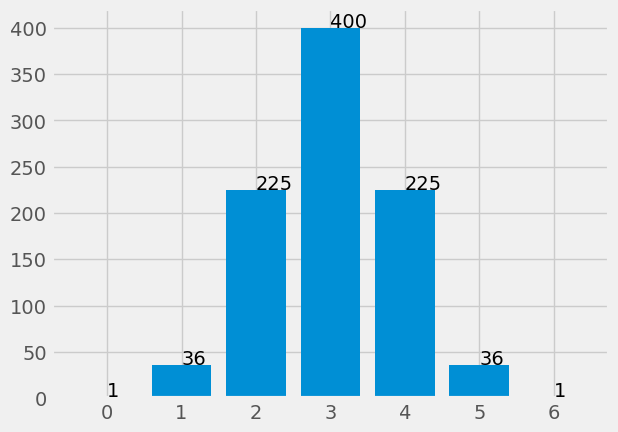

In [56]:
plt.bar(counts[0], counts[1])
for index, da in enumerate(x_counts):
    plt.text(x=index, y=da+1, s=f'{da}')

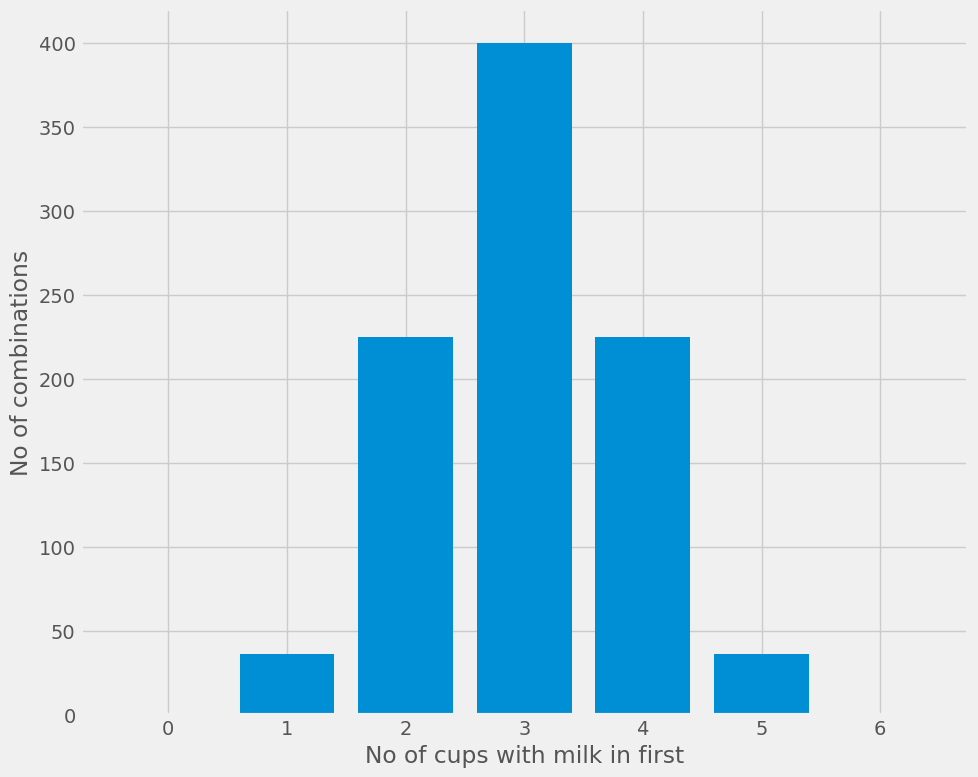

In [38]:
# Create a figure.
fig, ax = plt.subplots(figsize=(10, 8))

# Bar chart.
ax.bar(counts[0], counts[1])
ax.set_ylabel('No of combinations')
ax.set_xlabel('No of cups with milk in first')
ax.set_title('')

plt.tight_layout()
plt.show()

### References

Mathsisfun.com. (2017). Combinations and Permutations. [online] Available at: https://www.mathsisfun.com/combinatorics/combinations-permutations.html. [Accessed 10th Oct 2024].

Wikipedia Contributors (2019). Lady tasting tea. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Lady_tasting_tea. [Accessed 10th Oct 2024].

Wikipedia Contributors (2019). Ronald Fisher. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Ronald_Fisher. [Accessed 10th Oct 2024].

Winkler, A.M. (2015). The lady tasting tea experiment. [online] Brainder. Available at: https://brainder.org/2015/08/23/the-lady-tasting-tea-and-fishers-exact-test/. [Accessed 10th Oct 2024].

www.programiz.com. (n.d.). Python Program to Find the Factorial of a Number. [online] Available at: https://www.programiz.com/python-programming/examples/factorial. [Accessed 10th Oct 2024].

www.w3schools.com. (n.d.). Python math.comb() Method. [online] Available at: https://www.w3schools.com/python/ref_math_comb.asp.  [Accessed 16th Oct 2024].

---

## Task 2: Numpy's Normal Distribution

### Problem Statement

1. Generate, `numpy.random.normal()` , a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

2. Use the `scipy.stats.shapiro()` function to test whether the sample generated comes from a normal distribution. Explain the results and output.

3. Plot a histogram of the values and plot the corresponding normal distribution probability density function on top of it.

### References

---

## Task 3: t-Test Calculation

### Problem Statement

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

1. Calculate the t-statistic based on this data set, using Python.

2. Compare it to the value given by `scipy.stats`.

3. Explain your work and list any sources used.

### References

---

## Task 4: ANOVA

### Problem Statement

In this test the probability of committing a type II error in specific circumstances is estimated.

1. To begin, create a variable called `no_type_ii` and set it to `0`.

2. Use a loop to perform the following test 10,000 times.

3. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 

4. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.

5. Summarize and explain your results.

### References

---

Notebook ends.